In [14]:
from dotenv import load_dotenv
from langchain_teddynote import logging
from langchain_openai import ChatOpenAI
import os

# .env 파일에서 환경 변수를 로드
load_dotenv()

# OpenAI API 키를 환경 변수에서 로드
openai_api_key = os.getenv("OPENAI_API_KEY")
if not openai_api_key:
    raise ValueError("OPENAI_API_KEY 환경 변수가 설정되지 않았습니다.")

# 프로젝트 이름을 입력
langchain_project = os.getenv('LANGCHAIN_PROJECT')
if not langchain_project:
    raise ValueError("LANGCHAIN_PROJECT 환경 변수가 설정되지 않았습니다.")
logging.langsmith(langchain_project)

LangSmith 추적을 시작합니다.
[프로젝트명]
YoungWon


In [16]:
llm = ChatOpenAI(
    api_key=openai_api_key,
    temperature = 0.1,   # 창의성 (0.0 ~ 2.0) 높을 수록 무작위성 증가
    model_name = "gpt-4o"
)

question = "대한민국의 수도는 어디인가요?"

response = llm.invoke(question)

print(response)

print(response.content)

print(response.response_metadata)

content='대한민국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 중요한 역할을 하고 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 16, 'total_tokens': 47, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_25624ae3a5', 'finish_reason': 'stop', 'logprobs': None} id='run-60e0e844-2330-469d-8e6c-2f77726bd41e-0' usage_metadata={'input_tokens': 16, 'output_tokens': 31, 'total_tokens': 47}
대한민국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 중요한 역할을 하고 있습니다.
{'token_usage': {'completion_tokens': 31, 'prompt_tokens': 16, 'total_tokens': 47, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_25624ae3a5', 'finish_reason': 'stop', 'logprobs': None}


### LogProb 활성화
주어진 텍스트에 대한 모델의 토큰 확률의 로그 값을 의미

**토큰이란?**
문장을 구성하는 개별 단어나 문자 등의 요소를 의미

확률은 모델이 그 토큰을 예측할 확률


In [17]:
llm_with_logprob = ChatOpenAI(
    api_key=openai_api_key,
    temperature=0.1,
    max_tokens=2048,
    model_name="gpt-3.5-turbo",
).bind(logprobs=True)

In [19]:
question = "대한민국의 수도는 어디인가요?"

response = llm_with_logprob.invoke(question)

print(response.response_metadata)

{'token_usage': {'completion_tokens': 15, 'prompt_tokens': 24, 'total_tokens': 39, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': {'content': [{'token': '대', 'bytes': [235, 140, 128], 'logprob': -0.022742305, 'top_logprobs': []}, {'token': '한', 'bytes': [237, 149, 156], 'logprob': -1.9361265e-07, 'top_logprobs': []}, {'token': '\\xeb\\xaf', 'bytes': [235, 175], 'logprob': -1.8624639e-06, 'top_logprobs': []}, {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []}, {'token': '\\xea\\xb5', 'bytes': [234, 181], 'logprob': -4.3202e-07, 'top_logprobs': []}, {'token': '\\xad', 'bytes': [173], 'logprob': 0.0, 'top_logprobs': []}, {'token': '의', 'bytes': [236, 157, 152], 'logprob': -4.1273333e-06, 'top_logprobs': []}, {'token': ' 수', 'bytes': [32, 236, 136, 152], 'logprob': -6.704273e-07, 'top_logprobs': []}, {'token': '도', 'bytes': [235, 143, 132], 'logprob': -4.3202e-07

### 스트리밍 출력

In [20]:
answer = llm.stream("대한민국의 아름다운 관광지 3곳과 주소를 알려주세요")

for token in answer:
    print(token.content, end="", flush=True)

물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 그 중에서 세 곳을 추천드리겠습니다.

1. **경복궁**
   - **주소:** 서울특별시 종로구 사직로 161
   - 경복궁은 조선 왕조의 첫 번째 궁궐로, 한국의 역사와 문화를 느낄 수 있는 대표적인 장소입니다. 아름다운 건축물과 정원이 인상적입니다.

2. **경주 불국사**
   - **주소:** 경상북도 경주시 불국로 385
   - 불국사는 유네스코 세계문화유산으로 지정된 사찰로, 신라 시대의 불교 문화를 잘 보여줍니다. 석굴암과 함께 방문하면 더욱 좋습니다.

3. **제주도 한라산 국립공원**
   - **주소:** 제주특별자치도 제주시 1100로 2070-61
   - 한라산은 제주도의 중심에 위치한 화산으로, 다양한 등산로와 아름다운 자연 경관을 제공합니다. 사계절마다 다른 매력을 느낄 수 있습니다.

이 세 곳은 각각의 독특한 매력과 아름다움을 가지고 있어 방문할 만한 가치가 충분합니다. 즐거운 여행 되세요!

In [22]:
from langchain_teddynote.messages import stream_response

answer = llm.stream("대한민국의 아름다운 관광지 3곳과 주소를 알려주세요")
stream_response(answer)

물론입니다! 대한민국에는 많은 아름다운 관광지가 있습니다. 그 중에서 세 곳을 추천드리겠습니다.

1. **경복궁**
   - **주소:** 서울특별시 종로구 사직로 161
   - 경복궁은 조선 왕조의 법궁으로, 한국 전통 건축의 아름다움을 느낄 수 있는 곳입니다. 특히, 경복궁의 근정전과 경회루는 매우 유명합니다.

2. **경주 불국사**
   - **주소:** 경상북도 경주시 불국로 385
   - 불국사는 신라 시대의 대표적인 사찰로, 유네스코 세계문화유산으로 지정되어 있습니다. 석굴암과 함께 경주의 대표적인 관광지입니다.

3. **제주도 성산일출봉**
   - **주소:** 제주특별자치도 서귀포시 성산읍 일출로 284-12
   - 성산일출봉은 제주도의 동쪽 끝에 위치한 화산 분화구로, 일출을 보기 좋은 명소로 유명합니다. 아름다운 자연 경관과 함께 제주도의 독특한 지형을 감상할 수 있습니다.

이 세 곳은 각각의 독특한 매력을 가지고 있어 방문객들에게 특별한 경험을 선사합니다. 즐거운 여행 되시길 바랍니다!

### 멀티모달 모델(이미지 인식)
gpt-4o 또는 gpt-4-turbo 모델은 이미지 인식 기능(Vision)이 추가되어 있음


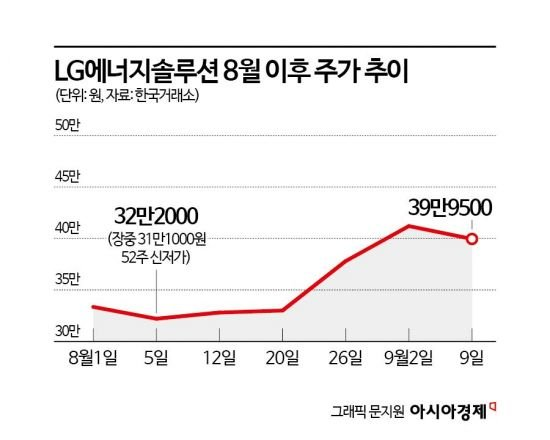

이 이미지는 "LG에너지솔루션 8월 이후 주가 추이"라는 제목의 선형 그래프를 보여줍니다. 그래프는 8월 1일부터 9월 9일까지의 주가 변동을 나타내며, 단위는 '만원'입니다. 8월 1일에 주가는 약 30만원에서 시작하여, 9월 9일에는 39만 9500원으로 상승한 것을 보여줍니다. 그래프의 중간 지점인 8월 26일에는 주가가 32만 2000원으로 크게 상승한 후, 이후에도 계속해서 상승 추세를 보이고 있습니다. 그래프 하단에는 "그래프 데이터 출처: 아시아경제"라고 명시되어 있습니다.

In [23]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

llm = ChatOpenAI(
    api_key=openai_api_key,
    temperature=0.1,
    max_tokens=2048,
    model_name="gpt-4-turbo",
)

multimodal_llm = MultiModal(llm)

IMAGE_URL = "https://thumbnews.nateimg.co.kr/view610///news.nateimg.co.kr/orgImg/ae/2024/09/10/ae_1725926649900_480441_0.jpg"

answer = multimodal_llm.stream(IMAGE_URL)

stream_response(answer)


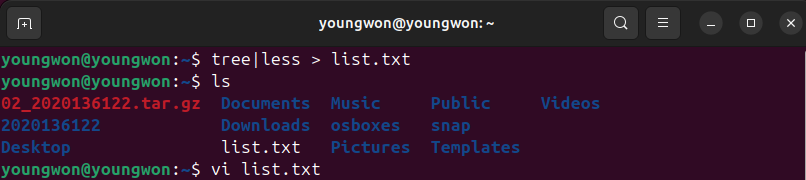

이 이미지는 터미널 화면을 보여줍니다. 사용자 'youngwon'이 'tree' 명령어를 사용하여 디렉토리 구조를 'list.txt' 파일에 저장하는 과정을 보여줍니다. 그 후 'ls' 명령어를 사용하여 현재 디렉토리의 파일과 폴더 목록을 보여주고, 'vi' 편집기를 사용하여 'list.txt' 파일을 열려고 하는 모습이 포함되어 있습니다. 화면은 주로 보라색과 검은색 톤으로 구성되어 있습니다.

In [26]:
IMAGE_PATH_FROM_FIEL = "C:/Users/lka11/Pictures/Screenshots/test.png"

answer = multimodal_llm.stream(IMAGE_PATH_FROM_FIEL)

stream_response(answer)

### System, User 프롬프트 수정


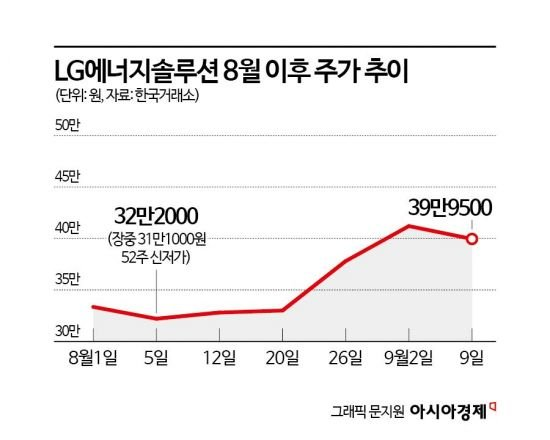

이 차트는 LG에너지솔루션의 주가 추이를 보여주고 있습니다. 8월 1일부터 9월 9일까지의 데이터를 기반으로 하고 있으며, 이 기간 동안 주가가 상당히 상승한 것을 볼 수 있습니다.

- 8월 1일에 주가는 약 30만 원대에서 시작했습니다.
- 주가는 8월 중순까지 비교적 안정적인 상승세를 보였으며, 8월 12일경에는 약 35만 원대에 도달했습니다.
- 8월 20일경에는 주가가 크게 상승하여 40만 원대를 넘어섰습니다. 특히 8월 31일에는 주가가 32만 2000원으로, 이전 대비 큰 폭으로 상승했습니다.
- 9월 초에 들어서면서 주가는 다소 안정화되는 모습을 보였으며, 9월 9일에는 39만 9500원으로 마감되었습니다.

이러한 주가의 상승은 특정한 기업 뉴스, 시장 변화, 또는 경제적 요인에 의해 영향을 받았을 가능성이 있습니다. 주가의 상승 추세는 투자자들에게 긍정적인 신호로 해석될 수 있으며, 향후 LG에너지솔루션의 사업 전망이나 시장 위치에 대한 기대감을 반영할 수 있습니다.

In [27]:
system_prompt = """
    당신은 차트를 해석하는 금융 AI 어시스턴트입니다. 당신의 임무는 주어진 차트를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다.
"""

user_prompt = """
    당신에게 주어진 표는 LG에너지솔루션의 주가 추이입니다. 흥미로운 사실을 정리해서 답변하세요.
"""

multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

answer = multimodal_llm_with_prompt.stream(IMAGE_URL)

stream_response(answer)